

# **Arboles de Decision**


In [3]:
##Importamos las librerias correspondientes para obtener un mejor analisis de datos y hacerlas graficas
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

##Importamos librerias para realizar los reportes
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
## cargamos el archivo para la lectura de datos
registros = pd.read_csv ('C:/Users/ldorado/Downloads/winequality_red.csv')

## Realizamos un analisis exploratorio en la cual mostramos 10 primeras filas que contiene el dataset.
registros.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
## identificamos la cantidad de registros que tiene el archivo winequality_red.csv (filas y columnas)
registros.shape

(1599, 12)

In [9]:
registros.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
## revision de valores faltantes
registros.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Se observa que en el dataset no hay valores faltantes

Text(0.5, 1.0, 'Valores faltantes y Atipicos')

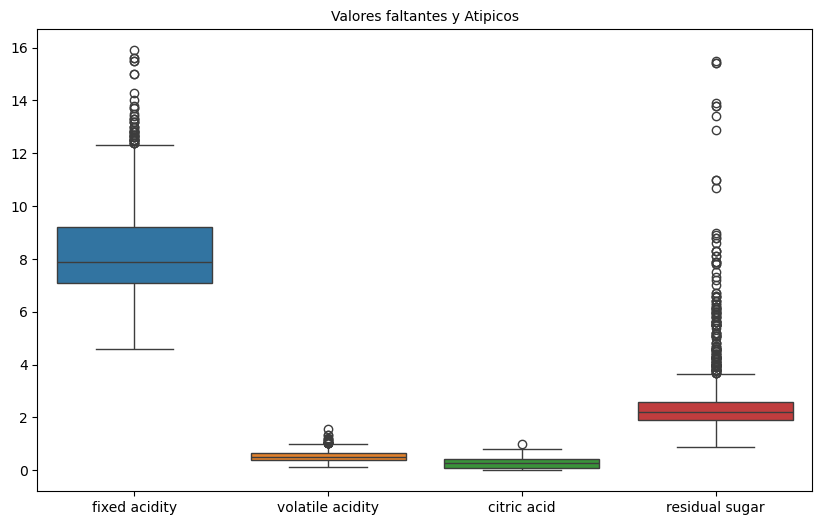

In [27]:
## Datos faltantes y Atipicos
plt.figure(figsize=(10,6))
sns.boxplot(data=registros[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar']])
plt.title( 'Valores faltantes y Atipicos', fontsize=10)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

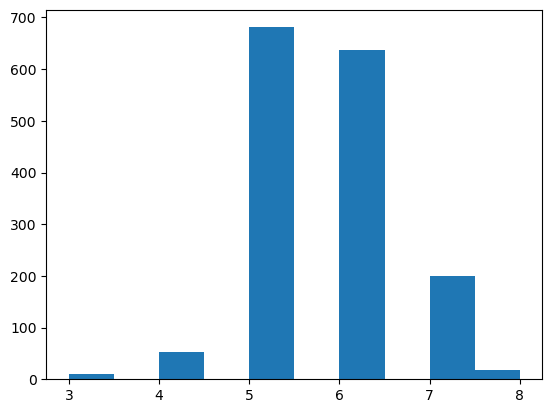

In [18]:
## En el siguiente Histograma podemos visualizar la cantidad de calidad de vinos que se encuentran en el dataset.
plt.hist(registros.quality)


De acuerdo a los resultados del histograma se evidencia que no esta balanceado la calidad de vinos mas altos son 5 y 6

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

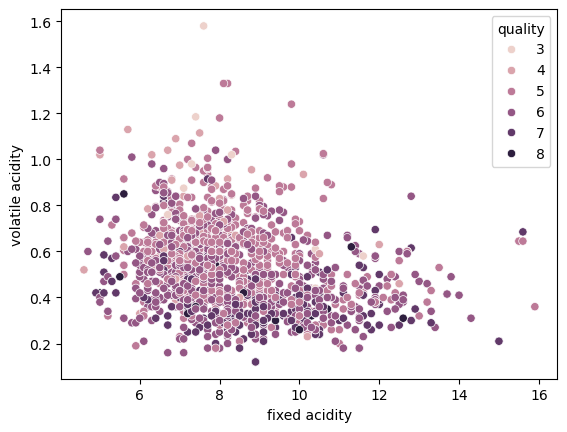

In [20]:
## Realizamos un diagrama de dispersion de las siguientes variables
sns.scatterplot(x ="fixed acidity", y = "volatile acidity", hue= "quality", data = registros)

<Axes: xlabel='chlorides', ylabel='sulphates'>

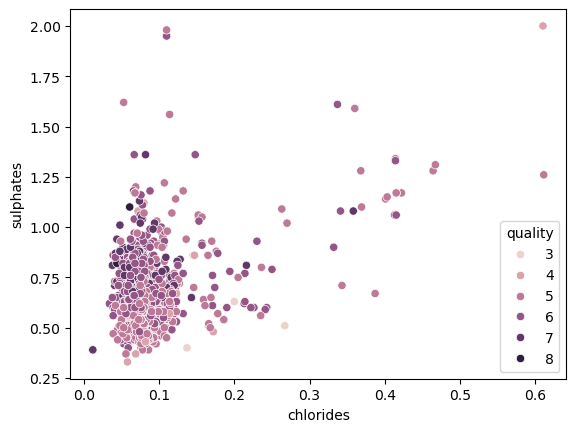

In [26]:
## Realizamos un diagrama de dispersion de las siguientes variables
sns.scatterplot(x ="chlorides", y = "sulphates",hue= "quality", data = registros)

In [34]:
## Realizamos las predicciones donde dividimos el dataset
prediction_col= ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH","sulphates", "alcohol"]
target_col= ['quality'] ## variable objetiva

In [31]:
predic = registros[prediction_col]
target= registros[target_col]

In [32]:
predic

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [33]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [35]:
## correlacion
correlacion= predic.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
chlorides,0.093705,0.061298,0.203823,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.109903,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000


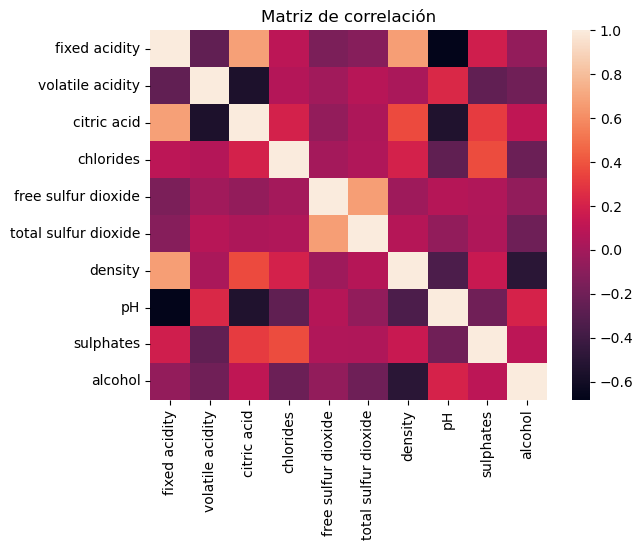

In [37]:
## Realizamos una matriz para observar la correlacion que hay entre estas variables
sns.heatmap(correlacion)
plt.title( 'Matriz de correlación')
plt.show()

En la matriz de correlacion se puede observar si hay correlacion directa y  debe estar entre -1 y 1. por ejemplo "fixed acidity"



De acuerdo con el dataset Red Wine Quality, se importo las Librerias correspondientes y se identifico con la siguiente línea de código Archivo.shape la cantidad de columnas y filas (1599,12).
- Se valido los datos faltantes y atípicos de cada variable la cual se observó en los resultados que no había valores faltantes todos estaban en 0.
- se realizo un histograma para visualizar si la cantidad de calidad de vinos estaba balanceada y se identificó que las calidades mas altas son 5 y 6
- se realizo un diagrama de dispersión de algunas variables para mostrar los valores de ”quality”
- En la matriz realizada se identifica si hay la correlación directa entre estas variables para que haya una correlación directa debe de estar entre -1 y 1
